## Part 1

In [2]:
import torch
import numpy as np

In [3]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.8.0+cu126


In [5]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [6]:
# grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4:0.01,-4.0:4:0.01]

In [8]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [18]:
# Compute Gaussian
z = torch.exp(-((x**2+y**2))/2.0)

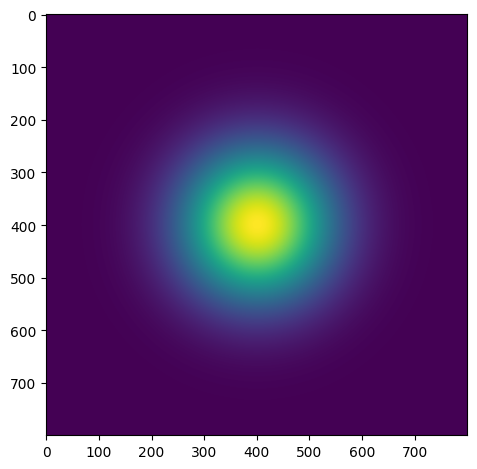

In [19]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

**AI Generated Section**

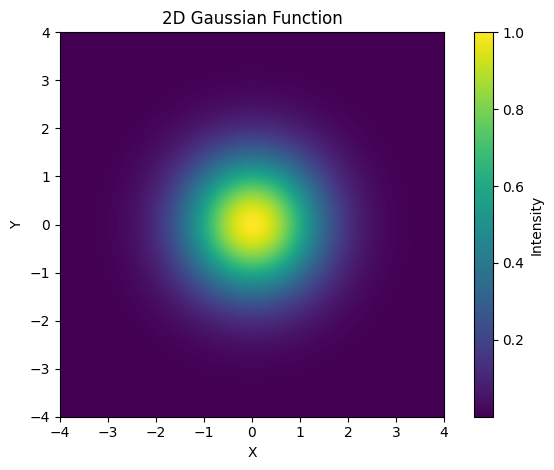

In [ ]:
# Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

import numpy as np

import matplotlib.pyplot as plt

# Create grid
X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# 2D Gaussian function
Z = np.exp(-((X**2 + Y**2) / 2.0))

# Plot
plt.imshow(Z, extent=[-4, 4, -4, 4], origin='lower')
plt.colorbar(label='Intensity')
plt.title('2D Gaussian Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'X')

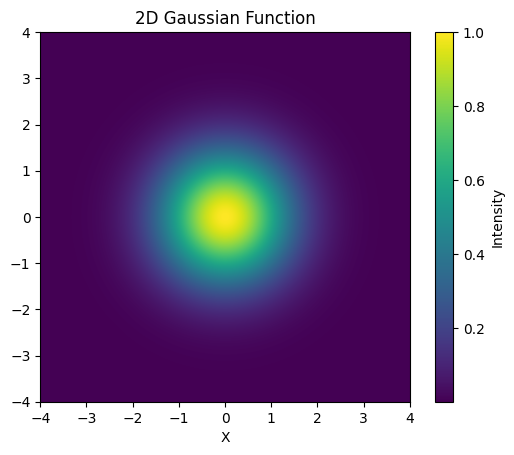

In [22]:
# Prompt: Convert this script to pytorch and use its tensors instead of numpy:
# import numpy as np

# import matplotlib.pyplot as plt

# # Create grid
# X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# # 2D Gaussian function
# Z = np.exp(-((X**2 + Y**2) / 2.0))

# # Plot
# plt.imshow(Z, extent=[-4, 4, -4, 4], origin='lower')
# plt.colorbar(label='Intensity')
# plt.title('2D Gaussian Function')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.tight_layout()
# plt.show()

import torch
import matplotlib.pyplot as plt

# Create grid using PyTorch
x = torch.arange(-4.0, 4.0, 0.01)
y = torch.arange(-4.0, 4.0, 0.01)
X, Y = torch.meshgrid(x, y, indexing='ij')

# 2D Gaussian function using PyTorch tensors
Z = torch.exp(-((X**2 + Y**2) / 2.0))

# Convert tensor to numpy array for plotting
Z_np = Z.numpy()

# Plot
plt.imshow(Z_np, extent=[-4, 4, -4, 4], origin='lower')
plt.colorbar(label='Intensity')
plt.title('2D Gaussian Function')
plt.xlabel('X')

Text(0, 0.5, 'Y')

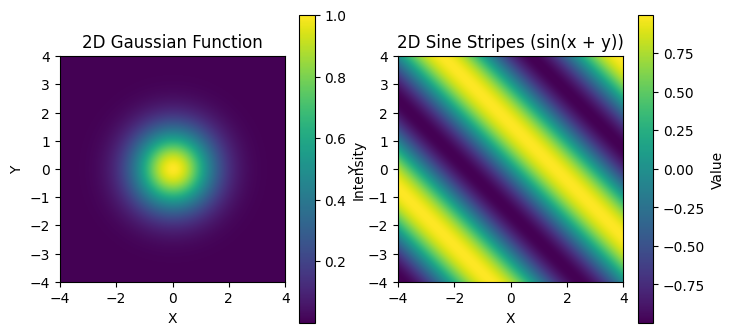

In [24]:
# Prompt: Now create a 2D sine function (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels) and another plot of the resulting Tensor that shows the ‘stripes’ of this function.
import torch
import matplotlib.pyplot as plt

# Create grid using PyTorch
x = torch.arange(-4.0, 4.0, 0.01)
y = torch.arange(-4.0, 4.0, 0.01)
X, Y = torch.meshgrid(x, y, indexing='ij')

# 2D Gaussian function using PyTorch tensors
Z_gauss = torch.exp(-((X**2 + Y**2) / 2.0))

# 2D Sine function: stripes along x+y direction
Z_sine = torch.sin(X + Y)

# Convert tensors to numpy arrays for plotting
Z_gauss_np = Z_gauss.numpy()
Z_sine_np = Z_sine.numpy()

# Plot Gaussian
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(Z_gauss_np, extent=[-4, 4, -4, 4], origin='lower')
plt.colorbar(label='Intensity')
plt.title('2D Gaussian Function')
plt.xlabel('X')
plt.ylabel('Y')

# Plot Sine stripes
plt.subplot(1, 2, 2)
plt.imshow(Z_sine_np, extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.colorbar(label='Value')
plt.title('2D Sine Stripes (sin(x + y))')
plt.xlabel('X')
plt.ylabel('Y')

**AI Generated Section Over**

Text(0, 0.5, 'Y')

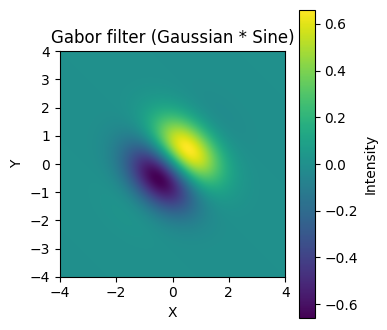

In [ ]:
# Gabor filter
import torch
import matplotlib.pyplot as plt

# Create grid using PyTorch
x = torch.arange(-4.0, 4.0, 0.01)
y = torch.arange(-4.0, 4.0, 0.01)
X, Y = torch.meshgrid(x, y, indexing='ij')

# 2D Gaussian function using PyTorch tensors
Z_gauss = torch.exp(-((X**2 + Y**2) / 2.0))

# 2D Sine function: stripes along x+y direction
Z_sine = torch.sin(X + Y)

# Convert tensors to numpy arrays for plotting
Z_gauss_np = Z_gauss.numpy()
Z_sine_np = Z_sine.numpy()

Z_gabor = Z_gauss_np * Z_sine_np

# Plot Gaussian
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(Z_gabor, extent=[-4, 4, -4, 4], origin='lower')
plt.colorbar(label='Intensity')
plt.title('Gabor filter (Gaussian * Sine)')
plt.xlabel('X')
plt.ylabel('Y')

## Part 2

In [28]:
import torch
import numpy as np

In [29]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [31]:
#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

C:\Users\jrglo\AppData\Local\Temp\ipykernel_17660\3009340817.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


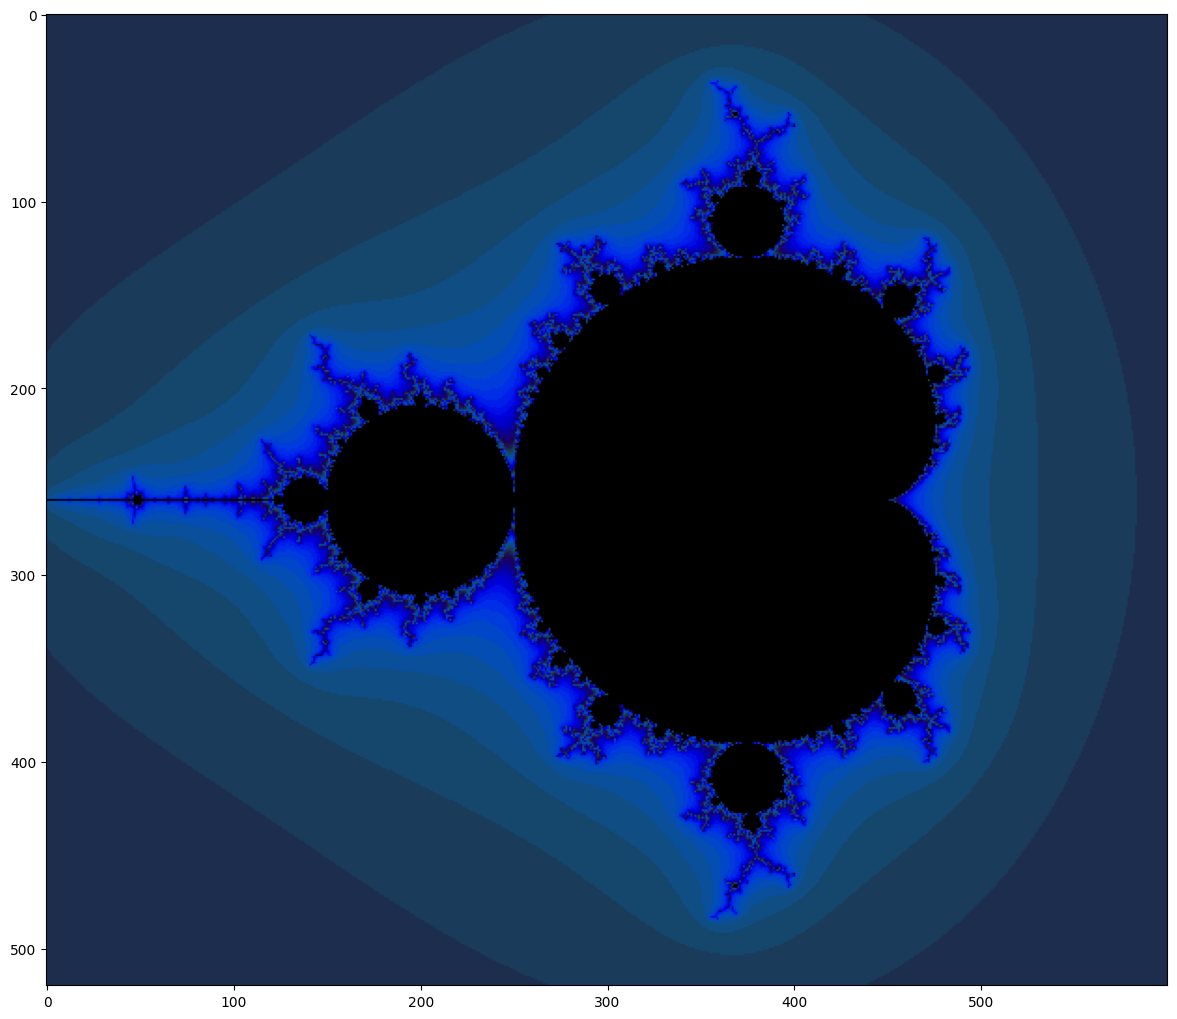

In [32]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Text(0, 0.5, 'Im')

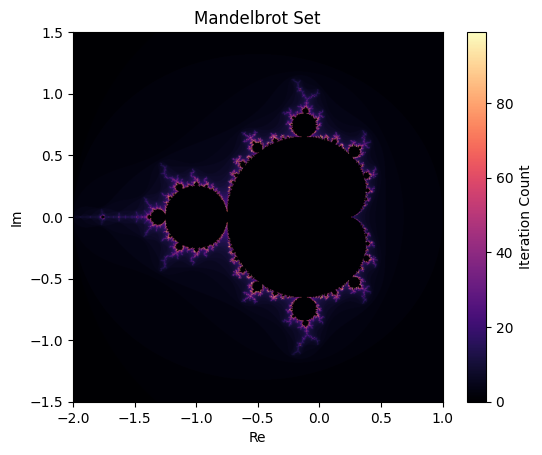

In [33]:
#Prompt: Generate a mandelbrot graph
import torch
import matplotlib.pyplot as plt

# Parameters
width, height = 800, 800
max_iter = 100
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Create grid of complex numbers
x = torch.linspace(xmin, xmax, width)
y = torch.linspace(ymin, ymax, height)
X, Y = torch.meshgrid(x, y, indexing='ij')
C = X + 1j * Y

# Mandelbrot calculation
Z = torch.zeros_like(C)
div_time = torch.zeros(C.shape, dtype=torch.int32)

for i in range(max_iter):
    mask = torch.abs(Z) <= 2
    Z[mask] = Z[mask] ** 2 + C[mask]
    div_time[mask & (torch.abs(Z) > 2)] = i

# Plot
plt.imshow(div_time.numpy().T, extent=[xmin, xmax, ymin, ymax], cmap='magma', origin='lower')
plt.colorbar(label='Iteration Count')
plt.title('Mandelbrot Set')
plt.xlabel('Re')
plt.ylabel('Im')

C:\Users\jrglo\AppData\Local\Temp\ipykernel_17660\575297351.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


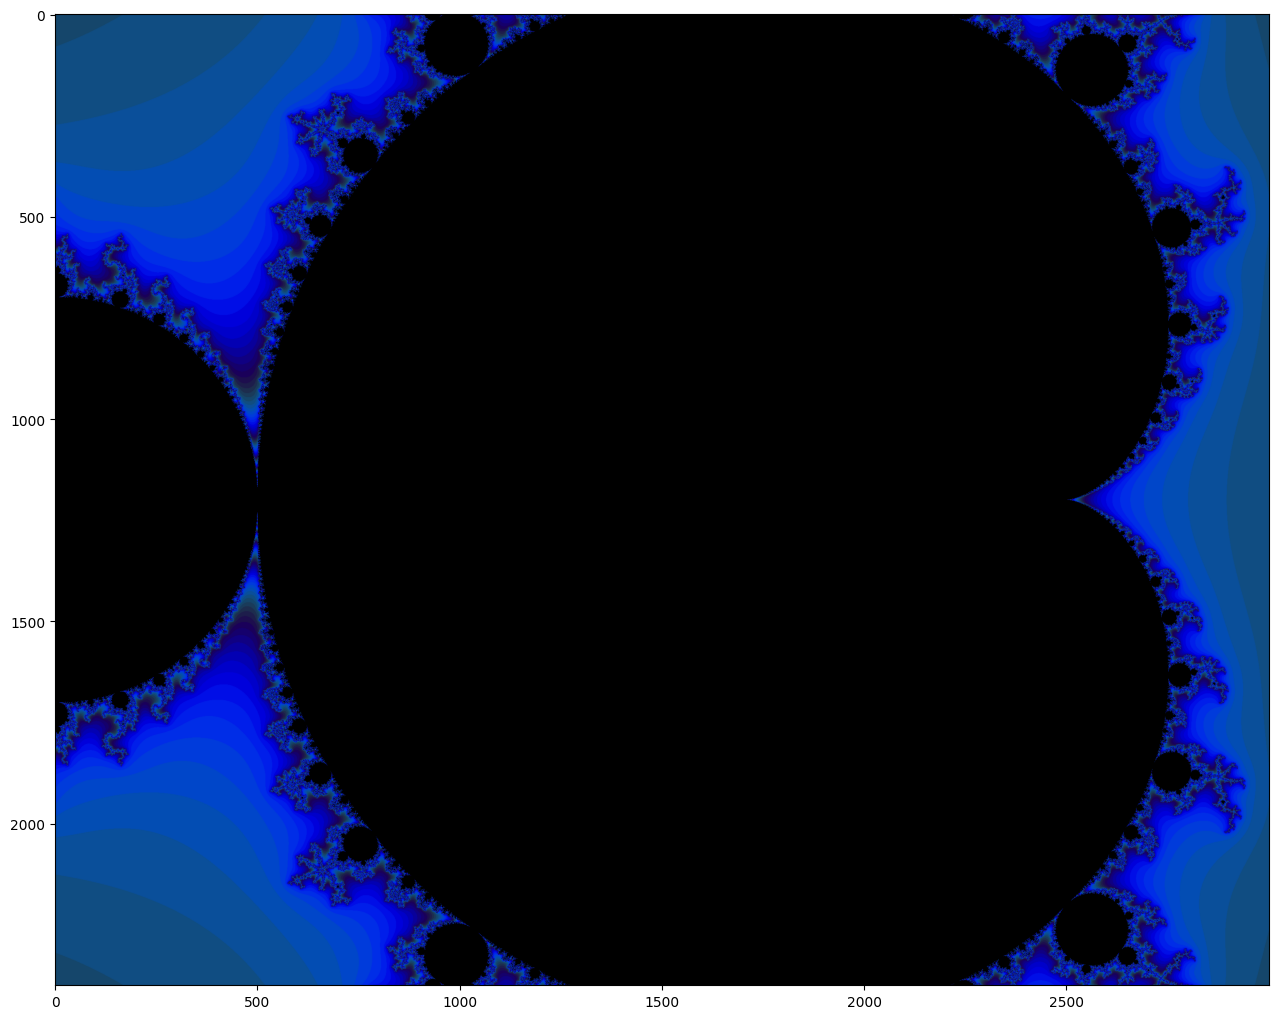

In [ ]:
#plot higher resolution computation

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-0.6:0.6:0.0005,-1:0.5:0.0005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)


#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 1.0, 'Julia Set (c = -0.8 + 0.156i)')

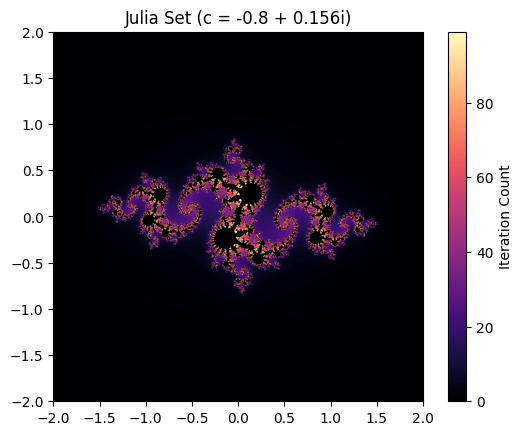

In [35]:
# Prompt: Modify this code to show a Julia set rather than a mandelbrot set:

# #Prompt: Generate a mandelbrot graph
# import torch
# import matplotlib.pyplot as plt

# Parameters
# width, height = 800, 800
# max_iter = 100
# xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Create grid of complex numbers
# x = torch.linspace(xmin, xmax, width)
# y = torch.linspace(ymin, ymax, height)
# X, Y = torch.meshgrid(x, y, indexing='ij')
# C = X + 1j * Y

# Mandelbrot calculation
# Z = torch.zeros_like(C)
# div_time = torch.zeros(C.shape, dtype=torch.int32)

# for i in range(max_iter):
# mask = torch.abs(Z) <= 2
# Z[mask] = Z[mask] ** 2 + C[mask]
# div_time[mask & (torch.abs(Z) > 2)] = i

# Plot
# plt.imshow(div_time.numpy().T, extent=[xmin, xmax, ymin, ymax], cmap='magma', origin='lower')
# plt.colorbar(label='Iteration Count')
# plt.title('Mandelbrot Set')
# plt.xlabel('Re')
# plt.ylabel('Im')


# Julia Set
import torch
import matplotlib.pyplot as plt

# Parameters
width, height = 800, 800
max_iter = 100
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0

# Julia set constant (change for different patterns)
c = complex(-0.8, 0.156)

# Create grid of complex numbers
x = torch.linspace(xmin, xmax, width)
y = torch.linspace(ymin, ymax, height)
X, Y = torch.meshgrid(x, y, indexing='ij')
Z = X + 1j * Y

div_time = torch.zeros(Z.shape, dtype=torch.int32)

for i in range(max_iter):
    mask = torch.abs(Z) <= 2
    Z[mask] = Z[mask] ** 2 + c
    div_time[mask & (torch.abs(Z) > 2)] = i

# Plot
plt.imshow(div_time.numpy().T, extent=[xmin, xmax, ymin, ymax], cmap='magma', origin='lower')
plt.colorbar(label='Iteration Count')
plt.title('Julia Set (c = -0.8 + 0.156i)')